📥 1. Instalação e Carregamento de Bibliotecas

In [1]:
# Instalar bibliotecas necessárias (caso ainda não estejam instaladas)
!pip install -q imbalanced-learn

# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE



📂 2. Carregamento do Dataset

In [2]:
# Carregando o dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


🔍 3. Análise Exploratória dos Dados




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64
 19  V19     21878 non-null  float64
 20  V20     21878 non-null  float64
 21  V21     21878 non-null  float64
 22

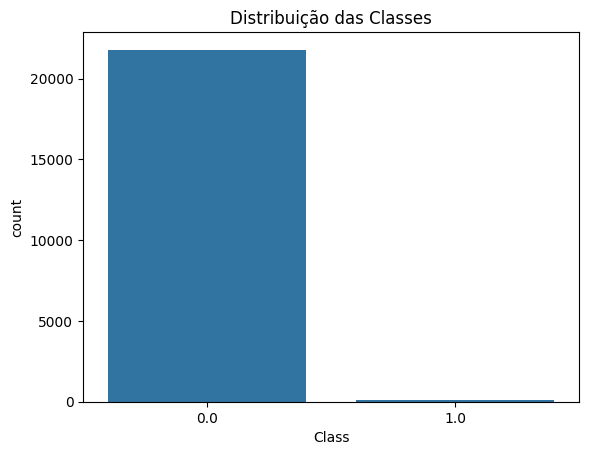

In [3]:
# Verificando informações gerais do dataset
df.info()

# Verificando a distribuição das classes
print(df['Class'].value_counts())

# Visualizando a distribuição das classes
sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes')
plt.show()

🔧 Passo de verificação e limpeza:

In [4]:
# Verificando se há valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Removendo linhas com valores ausentes, se houver
df.dropna(inplace=True)

# Verificando novamente
print("\nApós remoção de NaNs:")
print(df.isnull().sum())


Valores ausentes por coluna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

Após remoção de NaNs:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


🧹 4. Pré-processamento dos Dados




In [5]:
# Separando features e target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalizando a feature 'Amount'
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicando SMOTE para balancear as classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


📊 5. Aplicação de PCA para Visualização



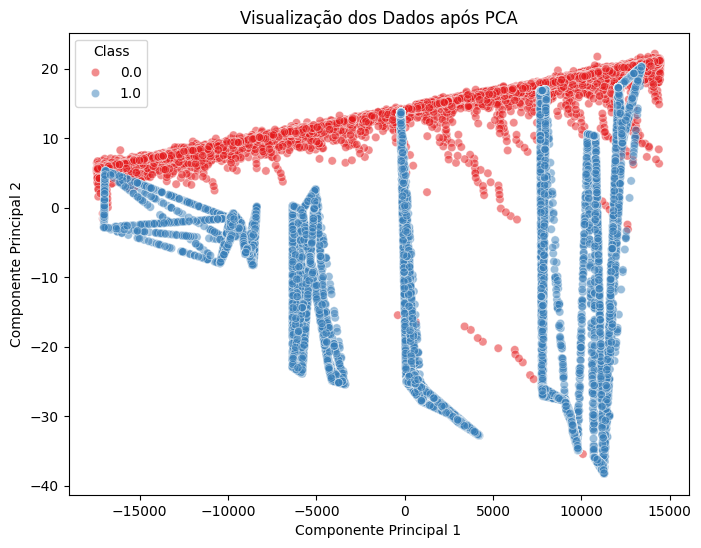

In [6]:
# Aplicando PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_res)

# Visualizando os dados após PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train_res, palette='Set1', alpha=0.5)
plt.title('Visualização dos Dados após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


🤖 6. Construção e Avaliação dos Modelos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4359
         1.0       0.26      1.00      0.41        17

    accuracy                           0.99      4376
   macro avg       0.63      0.99      0.70      4376
weighted avg       1.00      0.99      0.99      4376



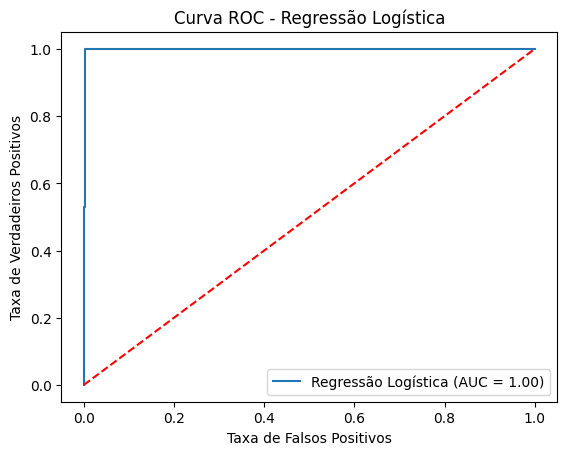

In [7]:
# Treinando o modelo de Regressão Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

# Avaliando o modelo
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

print("Relatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_lr))

# Curva ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Regressão Logística (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.show()


6.2 Random Forest



Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4359
         1.0       0.89      1.00      0.94        17

    accuracy                           1.00      4376
   macro avg       0.95      1.00      0.97      4376
weighted avg       1.00      1.00      1.00      4376



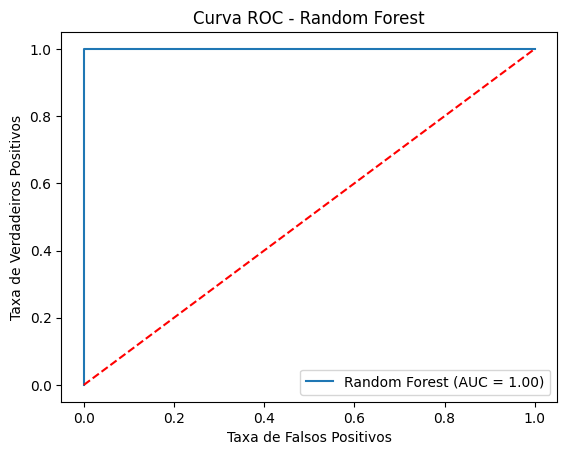

In [8]:
# Treinando o modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Avaliando o modelo
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()


 7. Conclusão
Neste projeto, aplicamos técnicas de modelagem multivariada para detecção de fraudes em transações de cartão de crédito. Utilizamos PCA para visualização dos dados e construímos modelos de Regressão Logística e Random Forest. O Random Forest apresentou melhor desempenho em termos de AUC-ROC, destacando-se na detecção de transações fraudulentas.

Este estudo reforça a eficácia de técnicas de aprendizado de máquina na identificação de padrões suspeitos em dados financeiros, contribuindo para a segurança das operações.